<a href="https://colab.research.google.com/github/Tahira82/HousePricePrediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
1488  1488          20       FV     9215    Inside     1Fam            5   
1058  1058          60       RL    11308    Inside     1Fam            5   
2804  2804          30       RL     8250    Inside     1Fam            7   
1613  1613         120       RM     2394    Inside    Twnhs            6   
1935  1935          60       RL     9535    Inside     1Fam            5   

      YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
1488       2009          2010     VinylSd         0.0       1218.0        NaN  
1058       2008          2008     VinylSd         0.0       1104.0   335000.0  
2804       1935          1950     Wd Sdng         0.0          0.0        NaN  
1613       1973          1973     CemntBd         0.0        945.0        NaN  
1935       1998          1998     VinylSd         0.0        926.0        NaN  
Data shape is  (2919, 13)
Data shape now is  (2919, 12)
<class 

<ipython-input-40-de91042777b8>:78: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




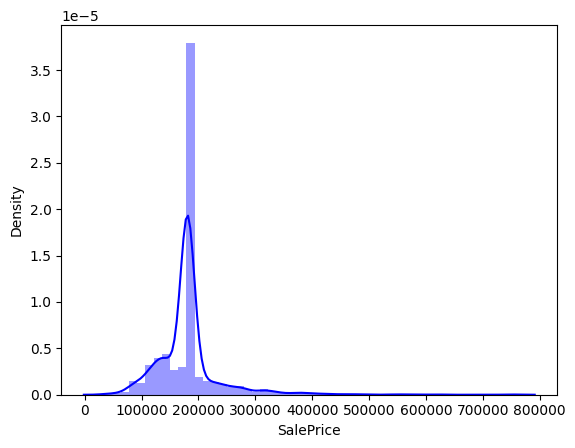

Positive Skewness : 2.871036
Kurtosis : 4.511397


Int64Index([249, 335, 706, 313], dtype='int64')


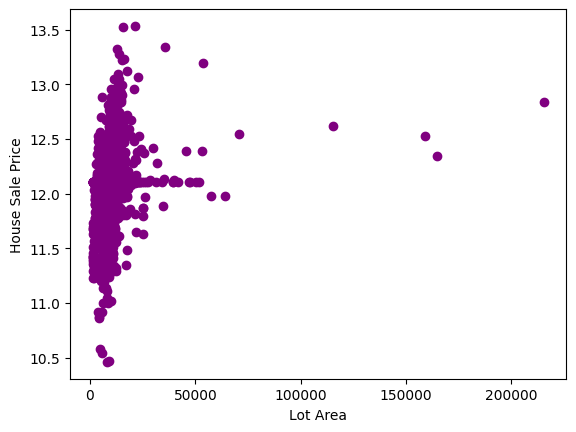

size of training data after removing outliers and adding normalization is  (2326, 37)
% loss for linear regressor:  0.17692972592199793
% loss for support vector regressor:  0.1859856016495109
% loss for random forest regressor:  0.17912264806414832


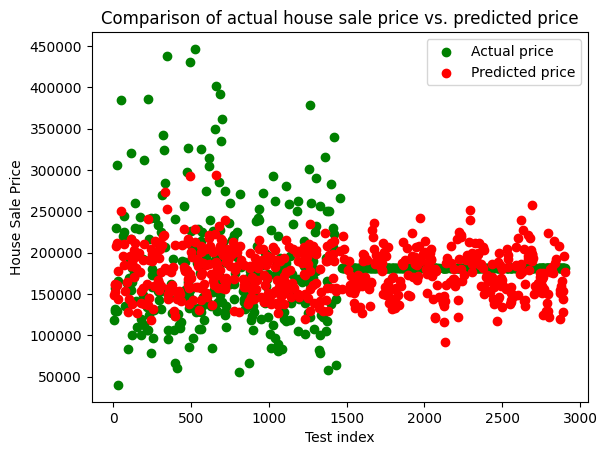

In [40]:
# House price prediction

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split #import function/classes not module
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
import plotly

# read excel data file to see how it can be used for house price prediction
housedataframe = pd.read_excel('HousePricePrediction.xlsx')
print(housedataframe.sample(5))

# get size of data to check which model should be deployed
print('Data shape is ', housedataframe.shape)

##### Data cleaning
#**remove features with irrelevant values:
##Here id is not relevant in house sale price calculation
#inplace changes the contents of original dataframe instead of result
housedataframe.drop(['Id'], axis=1, inplace=True)
print('Data shape now is ', housedataframe.shape)

#**replace missing data with null/mean/median/0 values acc. to task: Imputation
##Replace null values in salesprice with mean as percentage of missing data is high and we cannot delete
print(housedataframe.info())
print('percentage of missing sale price values ', (housedataframe.SalePrice.isnull().sum()/housedataframe.SalePrice.size)*100 )
housedataframe.SalePrice = housedataframe.SalePrice.fillna(housedataframe.SalePrice.mean())
print('percentage of missing sale price values now ', (housedataframe.SalePrice.isnull().sum()/housedataframe.SalePrice.size)*100 )

#**remove records with null in other features, as they are very few and negatively affect training
housedataframe.dropna(inplace=True)
print('final dataframe after data cleaning:\n', housedataframe.shape)

##### Data Preprocessing
# Numerical data is OK.
# We need to convert strings/objects to one-hot encoded vectors so model can understand and learn from data
# Find all data types in data from info
object_features = [col for col in housedataframe.columns if housedataframe.dtypes[col] == 'object']
print('object features ', object_features)

##One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
one_hot_output = encoder.fit_transform(housedataframe[object_features])
print('one hot encoder output ', one_hot_output.shape)

one_hot_output = pd.DataFrame(one_hot_output)
print('one hot encoder dataframe: \n', one_hot_output)

housedataframe.drop(object_features, axis=1, inplace=True)
print('now size is ', housedataframe)
print('removed previous object columns in dataframe: \n', housedataframe, 'size is ', housedataframe.shape)

#to avoid concatenation problems in new dataframe
one_hot_output.index = housedataframe.index #to retain number of data points
one_hot_output.columns = encoder.get_feature_names_out() # to retain object column names to match original features
housedata = pd.concat([housedataframe, one_hot_output], axis=1)
print('final dataframe after preprocessing \n', housedata)

###### Dataset Preparation
X = housedata.loc[:, housedata.columns != 'SalePrice']
Y = housedata['SalePrice']

print('X', X.columns)
print('Y', Y.name)

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.2, random_state=0)
print('data train size' ,X_train.shape)
print('label test size', Y_test.shape)

##Check skewness in training target(deviation from normal distribution)
sns.distplot(Y_train, color='blue')
plt.show()
print("Positive Skewness : %f" % Y_train.skew() )
Y_train = np.log1p(Y_train)
###Check outliers in training target
print("Kurtosis : %f" % Y_train.kurt())
MSSubClass = go.Box(name='MSSubClass', y=X_train['MSSubClass'])
LotArea = go.Box(name='LotArea', y=X_train['LotArea'])
OverallCond = go.Box(name='OverallCond', y=X_train['OverallCond'])
YearBuilt = go.Box(name='YearBuilt', y=X_train['YearBuilt'])
YearRemodAdd = go.Box(name='YearRemodAdd', y=X_train['YearRemodAdd'])
BsmtFinSF2 = go.Box(name='BsmtFinSF2', y=X_train['BsmtFinSF2'])
TotalBsmtSF = go.Box(name='TotalBsmtSF', y=X_train['TotalBsmtSF'])
SalePrice = go.Box(name='SalePrice', y=Y_train)
data = [MSSubClass, LotArea, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF2,
        TotalBsmtSF, SalePrice]
plotly.offline.iplot(data)
#As only LotArea has outliers, dropping training data with values > 100k
indexes = (X_train.iloc[np.where(X_train.LotArea > 100000)]).index
print(indexes)
plt.scatter(X_train['LotArea'], Y_train, color='purple')
plt.xlabel('Lot Area')
plt.ylabel('House Sale Price')
plt.show()
X_train.drop(indexes, axis=0, inplace=True)
Y_train.drop(indexes, axis=0, inplace=True)
print('size of training data after removing outliers and adding normalization is ', X_train.shape)

###### Model Selection
###- output is SalePrice which is float so it is a regression task.
#we choose some regression model

#1-linear regression
LinearRegModel = LinearRegression()
LinRegOut = LinearRegModel.fit(X_train, Y_train)
LRPredictedOut = LinRegOut.predict(X_test)
###-Loss calculation : Mean average absolute error
print('% loss for linear regressor: ', mean_absolute_percentage_error(Y_test, np.expm1(LRPredictedOut)))

#2-SVM
SVRModel = SVR()
SVRout = SVRModel.fit(X_train, Y_train)
SVRpredOut =SVRout.predict(X_test)
print('% loss for support vector regressor: ', mean_absolute_percentage_error(Y_test, np.expm1(SVRpredOut)))

#3-Random forest
RFModel = RandomForestRegressor(random_state=0)
RFout = RFModel.fit(X_train, Y_train)
RFpredOut = RFout.predict(X_test)
print('% loss for random forest regressor: ', mean_absolute_percentage_error(Y_test, np.expm1(RFpredOut)))

#CHOSEN MODEL: Linear Regressor as it gives the least error

#### Results Visualization
plt.scatter(Y_test.index, Y_test, color='green', label='Actual price')
plt.scatter(Y_test.index, np.expm1(LRPredictedOut), color='red', label='Predicted price')
plt.title('Comparison of actual house sale price vs. predicted price')
plt.xlabel('Test index')
plt.ylabel('House Sale Price')
plt.legend()
plt.show()